In [7]:
import glob, os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [50]:
path = '../data'
all_files = glob.glob(os.path.join(path, "kv_tallinn*.csv")) 
df_from_each_file = (pd.read_csv(f, na_values='-') for f in all_files)
df = pd.concat(df_from_each_file, ignore_index=True)

In [3]:
# df = pd.read_csv('../data/kv_tallinn_2020-01-30.csv', na_values='-')

In [4]:
df.head()

,street,district,rooms,area,price,price_m2,material,condition,year_built,age,floor,total_floors
0,Mooni 60,Kristiine,3.0,59.1,82700,1399.0,NaN,vajab renoveerimist,1974.0,45.0,4.0,9.0
1,Sitsi 14a-4,Põhja-Tallinn,3.0,67.6,164240,2430.0,kivimaja,uus,2020.0,0.0,2.0,3.0
2,Räime tn 17,Haabersti,3.0,73.6,157500,2140.0,kivimaja,NaN,2007.0,12.0,2.0,4.0
3,Sitsi 14a-3,Põhja-Tallinn,3.0,55.7,144035,2586.0,kivimaja,uus,2020.0,0.0,2.0,3.0
4,Valge tn 10e-6,Lasnamäe,4.0,88.4,209900,2374.0,kivimaja,uus,2020.0,0.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8103 entries, 0 to 8102
Data columns (total 12 columns):
street          8103 non-null object
district        8103 non-null object
rooms           8060 non-null float64
area            8092 non-null float64
price           8103 non-null int64
price_m2        8102 non-null float64
material        7028 non-null object
condition       7013 non-null object
year_built      6675 non-null float64
age             6675 non-null float64
floor           8016 non-null float64
total_floors    7952 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 759.8+ KB


In [6]:
df.describe()

,rooms,area,price,price_m2,year_built,age,floor,total_floors
count,8060.000000,8092.000000,8.103000e+03,8102.000000,6675.000000,6675.000000,8016.000000,7952.000000
mean,2.660918,68.398159,1.693797e+05,2434.159146,1994.985318,24.268165,4.267715,6.320171
std,1.037950,50.407984,1.411889e+05,2756.635297,64.481436,64.384239,28.774147,4.086612
min,1.000000,3.800000,3.500000e+02,0.000000,19.000000,0.000000,0.000000,-9.000000
25%,2.000000,45.400000,9.100000e+04,1846.000000,1979.000000,0.000000,2.000000,4.000000
50%,3.000000,62.100000,1.350000e+05,2281.000000,2017.000000,2.000000,3.000000,5.000000
75%,3.000000,79.400000,1.980000e+05,2823.000000,2019.000000,40.000000,5.000000,8.000000
max,13.000000,3151.000000,3.000000e+06,240000.000000,2021.000000,2000.000000,2007.000000,30.000000


In [7]:
df.isnull().sum() / len(df)

street          0.000000
district        0.000000
rooms           0.005307
area            0.001358
price           0.000000
price_m2        0.000123
material        0.132667
condition       0.134518
year_built      0.176231
age             0.176231
floor           0.010737
total_floors    0.018635
dtype: float64

In [8]:
df['price'].mean()

169379.72627421943

In [9]:
df['price'].median()

135000.0

In [10]:
df[df['district'] == 'Mustamäe']['price'].mean()

105872.5560165975

<h2>Clean data</h2>

<h3>Remove duplicates</h3>

In [11]:
df = df.drop_duplicates()

### Remove unnecessary columns

In [12]:
df.drop(['price_m2', 'age', 'floor', 'street'], axis=1, inplace=True)

<h3>Remove data that does not include rooms, area, material, condition or year_built</h3>

In [13]:
df = df[pd.notnull(df['rooms'])]
df = df[pd.notnull(df['area'])]
df = df[pd.notnull(df['material'])]
df = df[pd.notnull(df['condition'])]
df = df[pd.notnull(df['year_built'])]

### Find anomalies

In [14]:
df['district'].unique()

array(['Põhja-Tallinn', 'Lasnamäe', 'Kesklinn', 'Nõmme', 'Haabersti',
       'Kristiine', 'Mustamäe', 'Kadriorg', 'Pirita', 'Vanalinn',
       'Kesklinna', 'Mustamäe 191'], dtype=object)

In [15]:
df['rooms'].unique()

array([ 3.,  4.,  2.,  5.,  1.,  6.,  8.,  7., 11.])

In [16]:
df['material'].unique()

array(['kivimaja', 'paneelmaja', 'palkmaja', 'puitmaja'], dtype=object)

In [17]:
df['condition'].unique()

array(['uus', 'renoveeritud', 'keskmises seisukorras', 'heas korras',
       'vajab renoveerimist', 'vajab san. remonti', 'san. remont tehtud'],
      dtype=object)

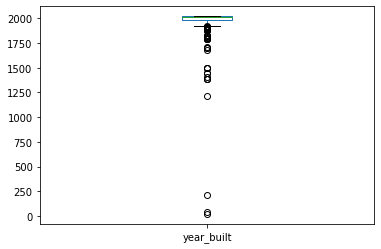

In [18]:
df['year_built'].plot(kind='box')
plt.show()

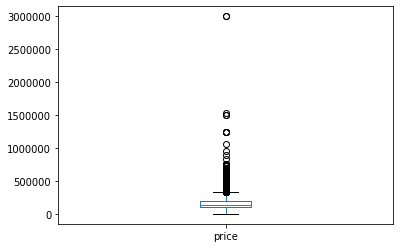

In [19]:
df['price'].plot(kind='box')
plt.show()

In [20]:
df.drop(df[df.price > 2500000].index, inplace=True)
df.drop(df[df.price < 4000].index, inplace=True)
df.drop(df[df.year_built < 750].index, inplace=True)

<h3>Correct district typos</h3>

In [21]:
df['district'].unique()

array(['Põhja-Tallinn', 'Lasnamäe', 'Kesklinn', 'Nõmme', 'Haabersti',
       'Kristiine', 'Mustamäe', 'Kadriorg', 'Pirita', 'Vanalinn',
       'Kesklinna', 'Mustamäe 191'], dtype=object)

In [22]:
df['district'] = df['district'].replace('Põhja-Tallinna', 'Põhja-Tallinn')
df['district'] = df['district'].replace('Kesklinna', 'Kesklinn')
df['district'] = df['district'].replace('Mustamäe 191', 'Mustamäe')

In [23]:
df['district'].unique()

array(['Põhja-Tallinn', 'Lasnamäe', 'Kesklinn', 'Nõmme', 'Haabersti',
       'Kristiine', 'Mustamäe', 'Kadriorg', 'Pirita', 'Vanalinn'],
      dtype=object)

### Replace NaN values with mean

In [24]:
df = df.fillna(df.mean())

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4554 entries, 1 to 8102
Data columns (total 9 columns):
street          4554 non-null object
district        4554 non-null object
rooms           4554 non-null float64
area            4554 non-null float64
price           4554 non-null int64
material        4554 non-null object
condition       4554 non-null object
year_built      4554 non-null float64
total_floors    4554 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 355.8+ KB


### Data is now cleaned. Save cleaned data to new csv.

In [26]:
# df.to_csv(r'../data/tln_clean_data.csv', index=False)

In [8]:
df = pd.read_csv(r'../data/tln_clean_data.csv', na_values='-')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4554 entries, 0 to 4553
Data columns (total 9 columns):
street          4554 non-null object
district        4554 non-null object
rooms           4554 non-null float64
area            4554 non-null float64
price           4554 non-null int64
material        4554 non-null object
condition       4554 non-null object
year_built      4554 non-null float64
total_floors    4554 non-null float64
dtypes: float64(4), int64(1), object(4)
memory usage: 320.3+ KB


### Analyse prices by district, material and condition

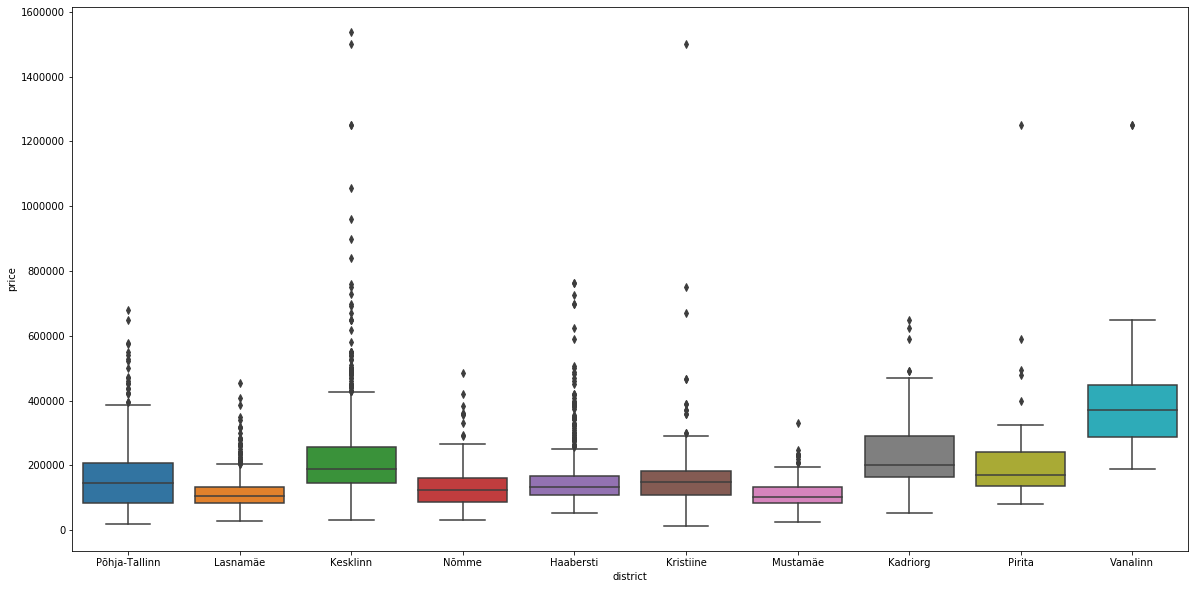

In [53]:
plt.figure(figsize=(20,10))
sns.boxplot(x="district", y="price", data=df);

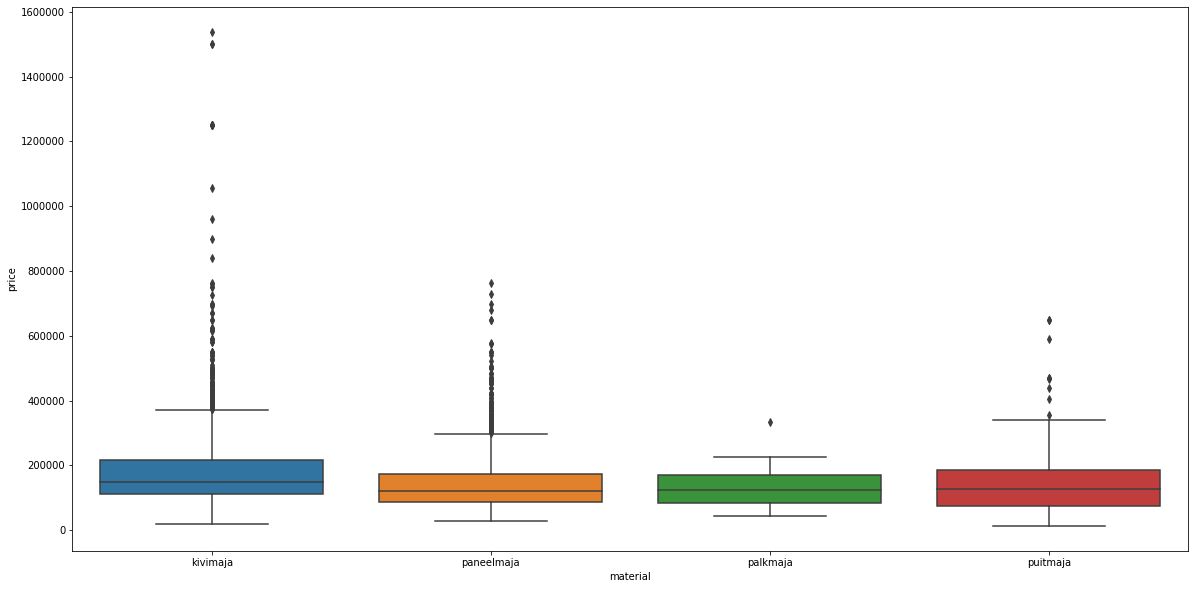

In [54]:
plt.figure(figsize=(20,10))
sns.boxplot(x="material", y="price", data=df);

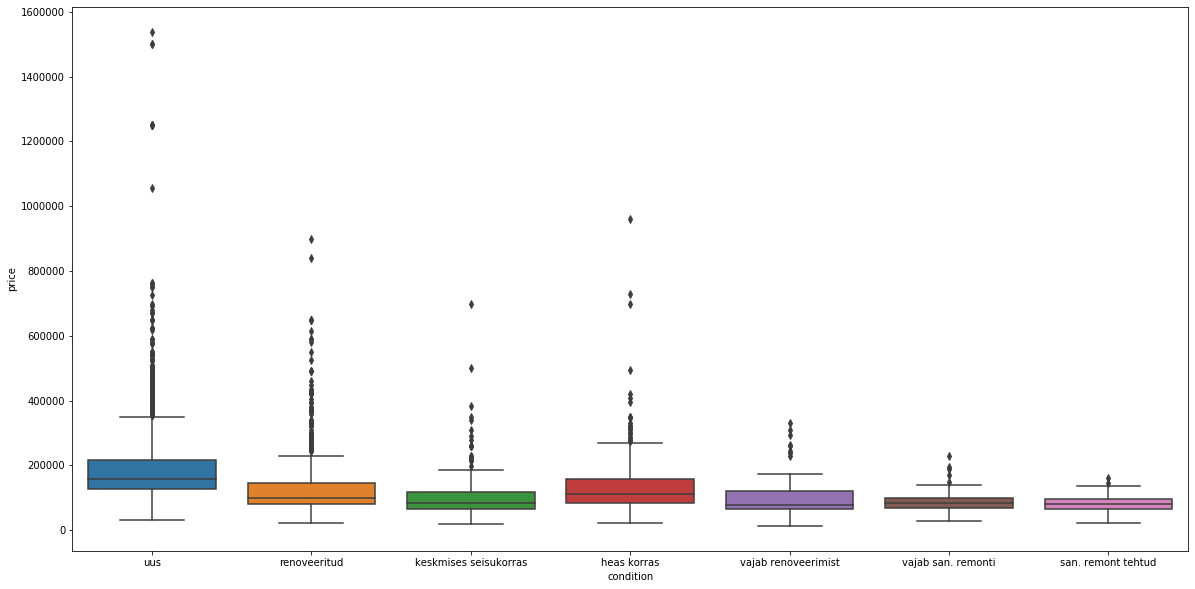

In [55]:
plt.figure(figsize=(20,10))
sns.boxplot(x="condition", y="price", data=df);

### Check correlations

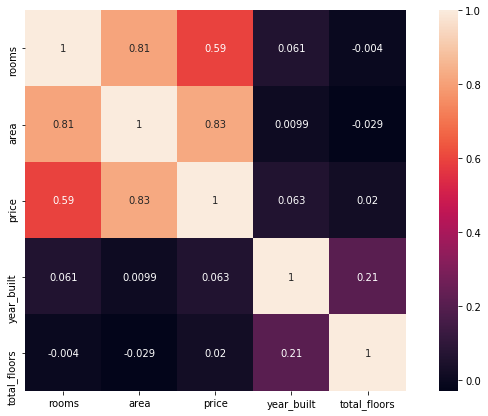

In [56]:
df_corr = df.corr()
plt.figure(figsize=(12,7))
sns.heatmap(data=df_corr, annot=True, square=True)

<h2>Use One Hot Encoding to convert categorical data to numerical values</h2>

In [57]:
district = pd.get_dummies(df['district'])
material = pd.get_dummies(df['material'])
condition = pd.get_dummies(df['condition'])

In [58]:
df = pd.concat([df, district, material, condition], axis=1)

<h3>Remove non-numeric features</h3>

In [59]:
df.drop(['street', 'district', 'material', 'condition'], axis=1, inplace=True)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4554 entries, 0 to 4553
Data columns (total 26 columns):
rooms                    4554 non-null float64
area                     4554 non-null float64
price                    4554 non-null int64
year_built               4554 non-null float64
total_floors             4554 non-null float64
Haabersti                4554 non-null uint8
Kadriorg                 4554 non-null uint8
Kesklinn                 4554 non-null uint8
Kristiine                4554 non-null uint8
Lasnamäe                 4554 non-null uint8
Mustamäe                 4554 non-null uint8
Nõmme                    4554 non-null uint8
Pirita                   4554 non-null uint8
Põhja-Tallinn            4554 non-null uint8
Vanalinn                 4554 non-null uint8
kivimaja                 4554 non-null uint8
palkmaja                 4554 non-null uint8
paneelmaja               4554 non-null uint8
puitmaja                 4554 non-null uint8
heas korras              4554 

### Separate features(X) and labels(y)

In [9]:
X = df.drop(['price'], axis=1)
y = df['price']

### Create training and test data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30, random_state=0)

## Find best model

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
import lightgbm
import catboost
from sklearn.metrics import explained_variance_score

In [77]:
lir = LinearRegression()
lir.fit(X_train, y_train)
lir.score(X_test, y_test)

0.7952348803482394

In [78]:
rfg = RandomForestRegressor()
rfg.fit(X_train, y_train)
rfg.score(X_test, y_test)

/Users/andre/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8647624574353654

In [79]:
abr = AdaBoostRegressor()
abr.fit(X_train, y_train)
abr.score(X_test, y_test)

0.6919723918112104

In [80]:
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr.score(X_test, y_test)

0.860820007718518

In [81]:
xgb = xgboost.XGBRegressor()
xgb.fit(X_train,y_train)
xgb.score(X_test, y_test)

/Users/andre/anaconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:41:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8588979160779195

In [82]:
lgbm = lightgbm.LGBMRegressor()
feature_names = [e.replace('õ', 'o').replace('ä', 'a') for e in X.columns]
lgbm.fit(X_train, y_train, feature_name=feature_names)
lgbm.score(X_test, y_test)

0.8464651779297354

In [85]:
cb = catboost.CatBoostRegressor()
cb.fit(X_train, y_train, verbose=False)
cb.score(X_test, y_test)

0.904839550716917

## catboost got the best result. Let's use that as our model.

In [22]:
df = pd.read_csv(r'../data/tln_clean_data.csv', na_values='-')

In [23]:
from sklearn.model_selection import train_test_split

X = df.drop(['price', 'street'], axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [90]:
import catboost

categorical_features_indices = np.where(X.dtypes != np.float)[0]

m = catboost.CatBoostRegressor(one_hot_max_size=20)
m.fit(X_train, y_train, verbose=False, cat_features=categorical_features_indices)
m.score(X_test, y_test)

0.9040278149155629

## Save model

In [2]:
import joblib 

In [92]:
# joblib.dump(m, r'../tln_house_model.pkl') 

['../tln_house_model.pkl']

### load the model

In [18]:
model = joblib.load("../tln_house_model.pkl")

In [27]:
user_input = {
    'district': 'Mustamäe',
    'area': '42',
    'rooms': '2',
    'total_floors': '7',
    'year_built': '1977',
    'material': 'kivimaja',
    'condition': 'heas korras'
}

X_columns = list(X.columns.values)
d = pd.DataFrame(0, index=[0], columns=X_columns)
d

d['area'] = user_input['area']
d['rooms'] = user_input['rooms']
d['year_built'] = user_input['year_built']
d['district'] = user_input['district']
d['material'] = user_input['material']
d['condition'] = user_input['condition']
d['total_floors'] = user_input['total_floors']

model.predict(d)[0]

82028.05433647013

In [29]:
user_input = {
    'district': 'Nõmme',
    'area': '80',
    'rooms': '3',
    'total_floors': '3',
    'year_built': '1950',
    'material': 'puumaja',
    'condition': 'heas korras'
}

X_columns = list(X.columns.values)
d = pd.DataFrame(0, index=[0], columns=X_columns)
d

d['area'] = user_input['area']
d['rooms'] = user_input['rooms']
d['year_built'] = user_input['year_built']
d['district'] = user_input['district']
d['material'] = user_input['material']
d['condition'] = user_input['condition']
d['total_floors'] = user_input['total_floors']

model.predict(d)[0]

134503.38884124314

In [96]:
predictions = model.predict(X_test)

In [102]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 19495.44531164759
MSE: 1370108558.158559
RMSE: 37014.97748423683


In [103]:
from catboost import Pool

In [104]:
model.get_feature_importance()

array([10.26943168,  4.84749776, 56.23448732,  2.69188245,  6.17943408,
       11.51532609,  8.26194063])

Got unsafe target value = 1.057e+06 at object #192 of dataset 


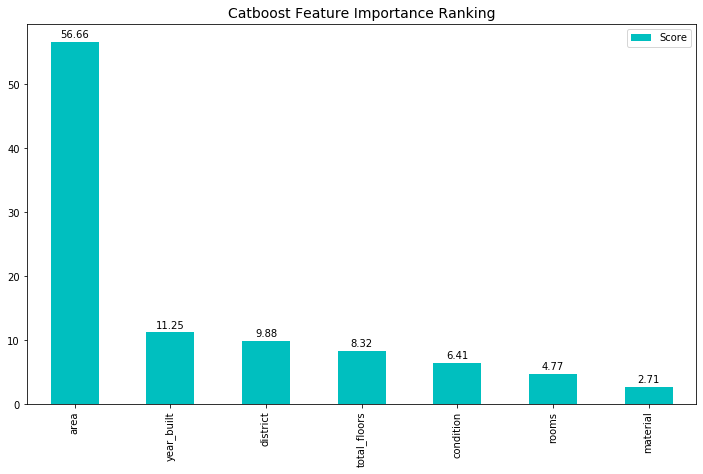

In [105]:
feature_score = pd.DataFrame(list(zip(X.dtypes.index, model.get_feature_importance(Pool(X, label=y, cat_features=categorical_features_indices)))),
                columns=['Feature','Score'])

feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

plt.rcParams["figure.figsize"] = (12,7)
ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()